Machine Learning Class Project

Images Data Source: https://www.kaggle.com/c/state-farm-distracted-driver-detection

State Farm Distracted Driver Images

10 different labels/categories, taken from 26 different drivers 

Each color image is 640*480 pixels, and there are 22,424 images in training dataset


In [1]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import cv2
from PIL import Image


%matplotlib inline

Envestigate the Data Set

In [6]:
image_path='../dataSetImage/stateFarm_distractedDriver_all/imgs/train/c0/img_44733.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

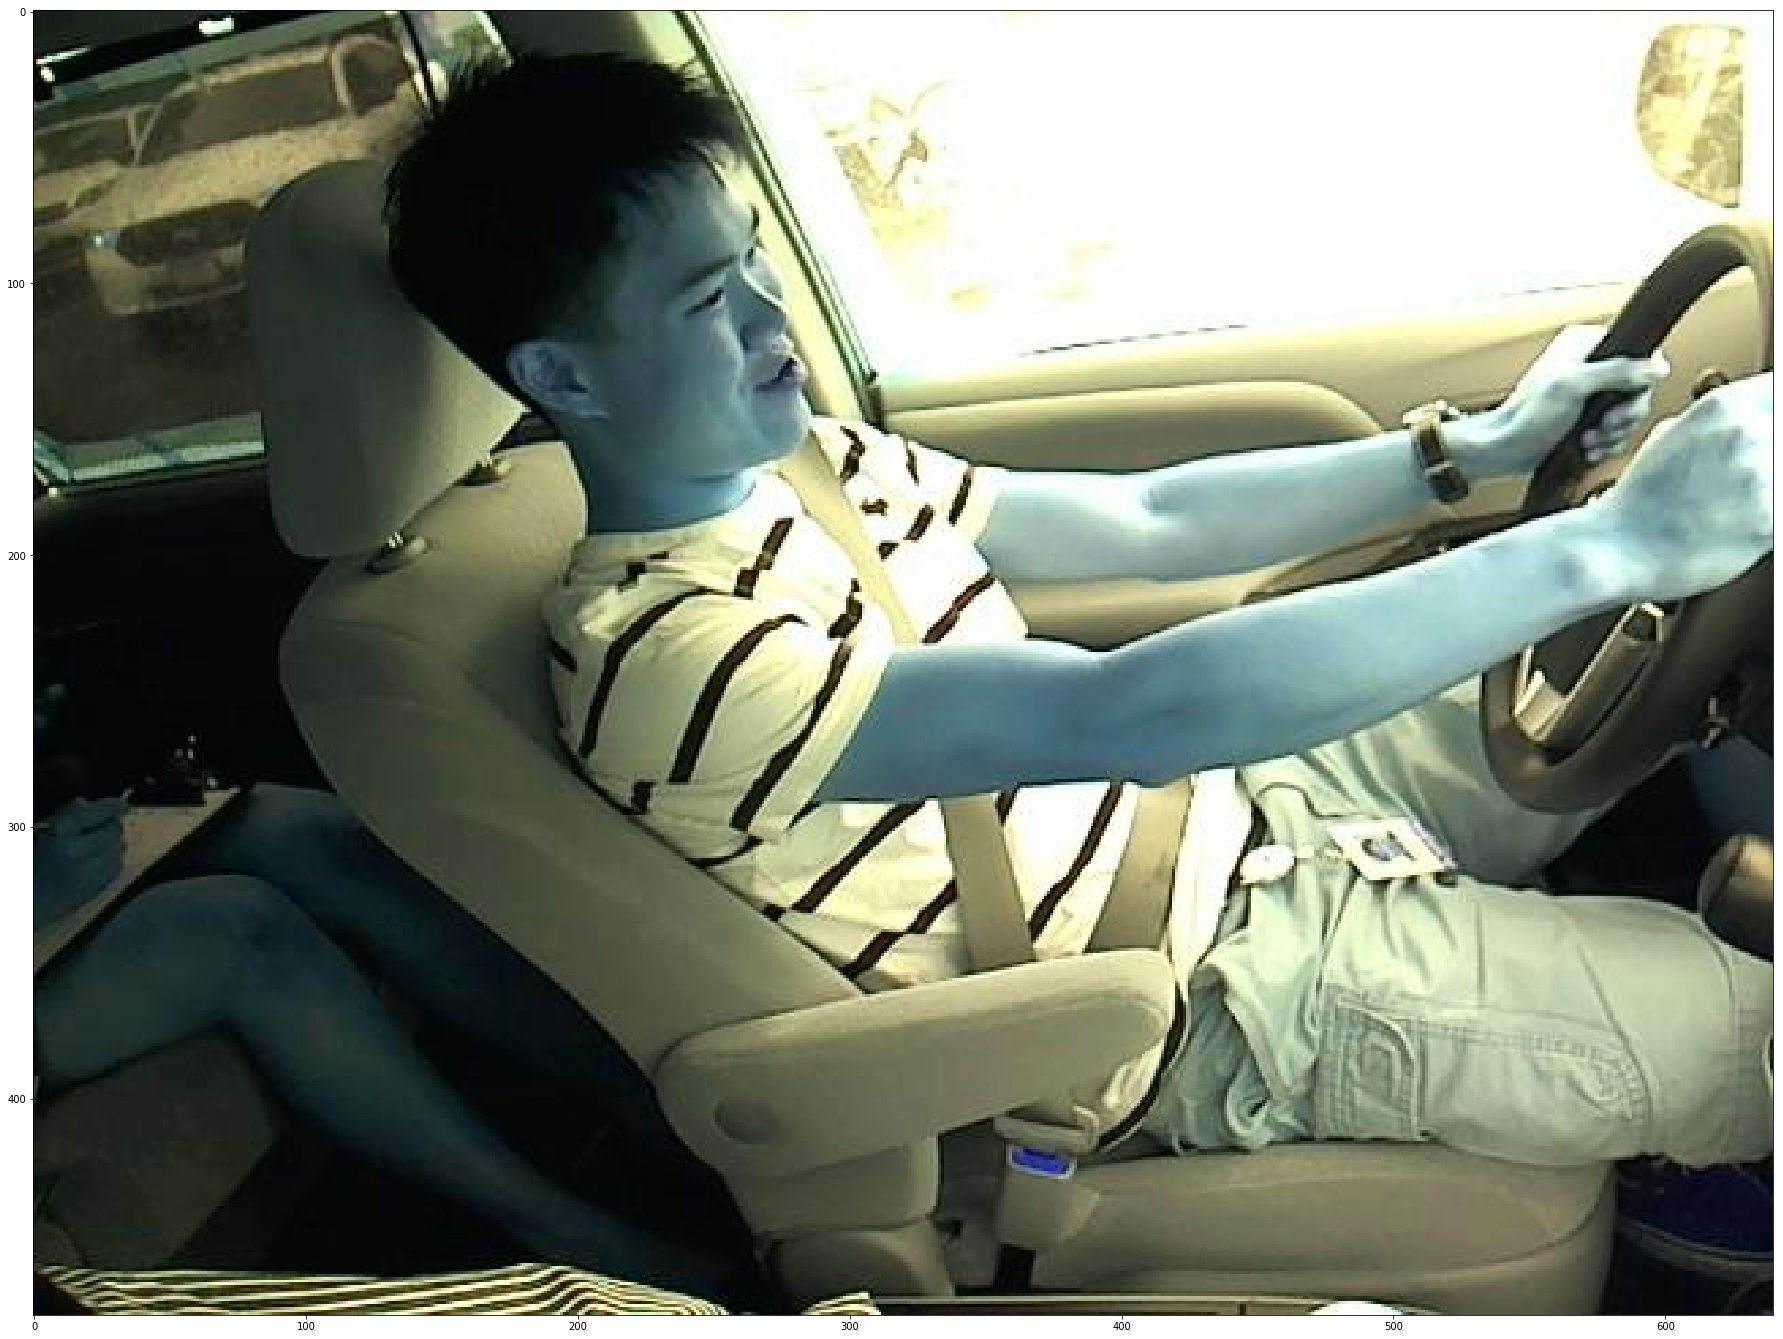

In [9]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image)

In [10]:
image2=image
image2 = cv2.resize(image2, (120,160)) #1/4 of both dimention

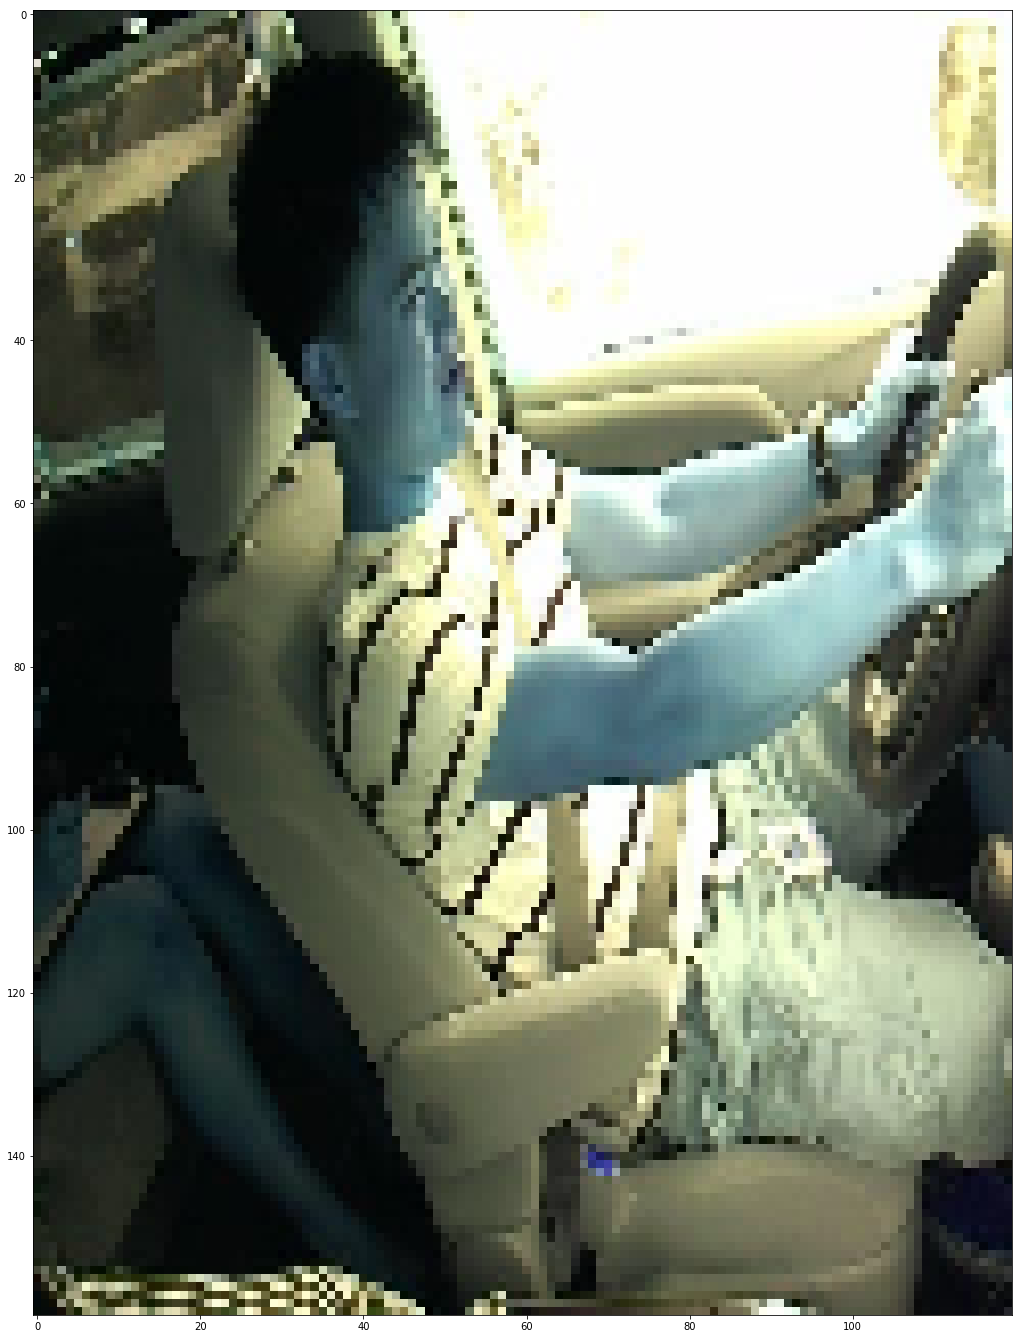

In [11]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image2)

In [12]:
image3=image
image3 = cv2.resize(image3, (60,80)) #1/8 of both dimention

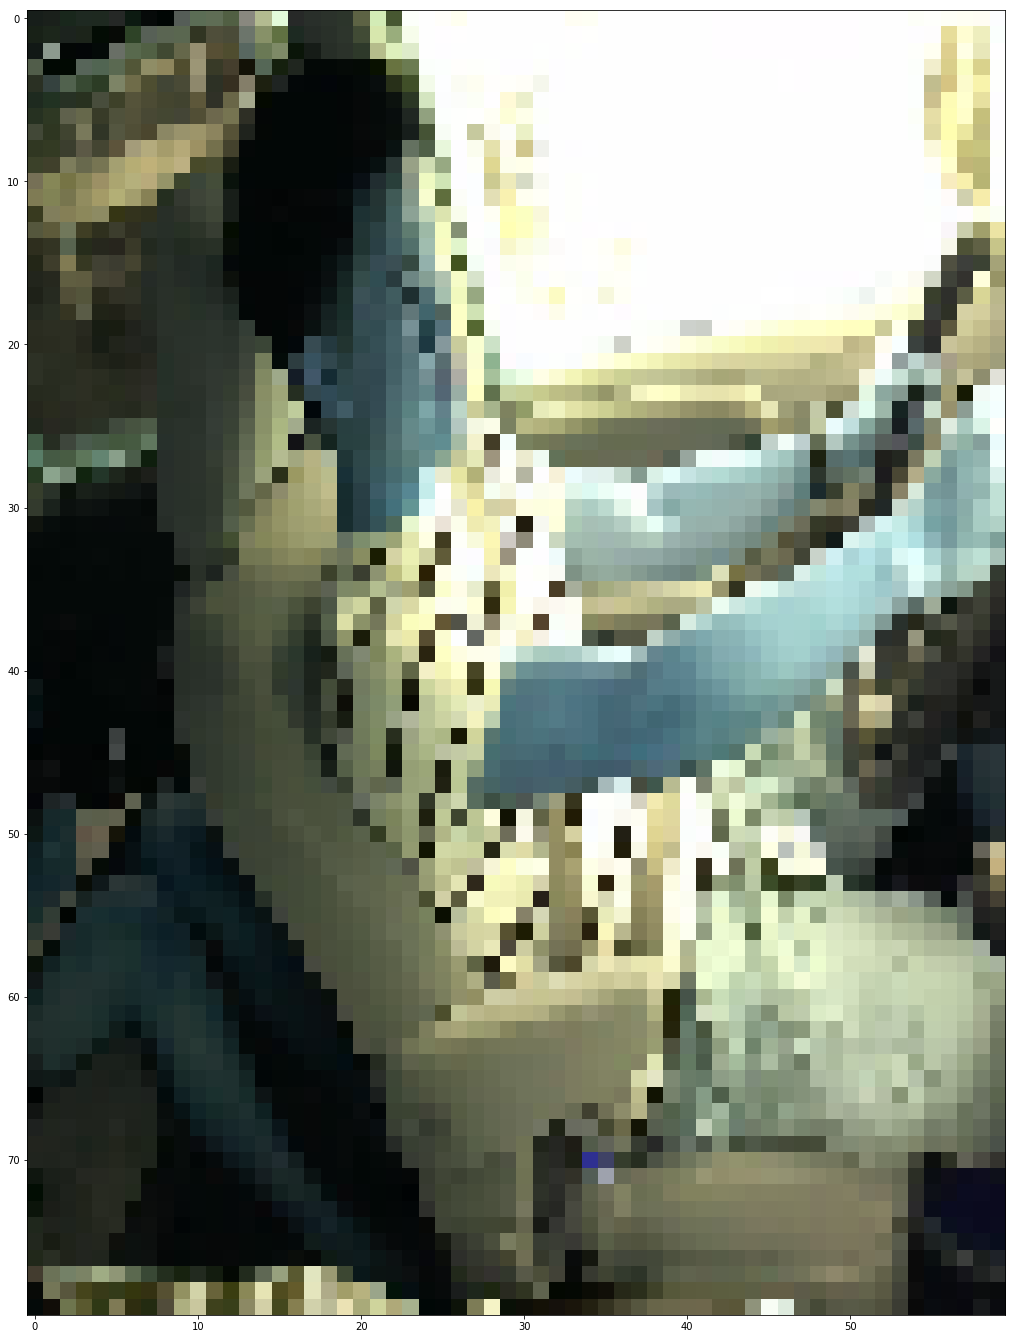

In [13]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image3)

In [14]:
image4=image
image4 = cv2.cvtColor(image4, cv2.COLOR_RGB2BGR)

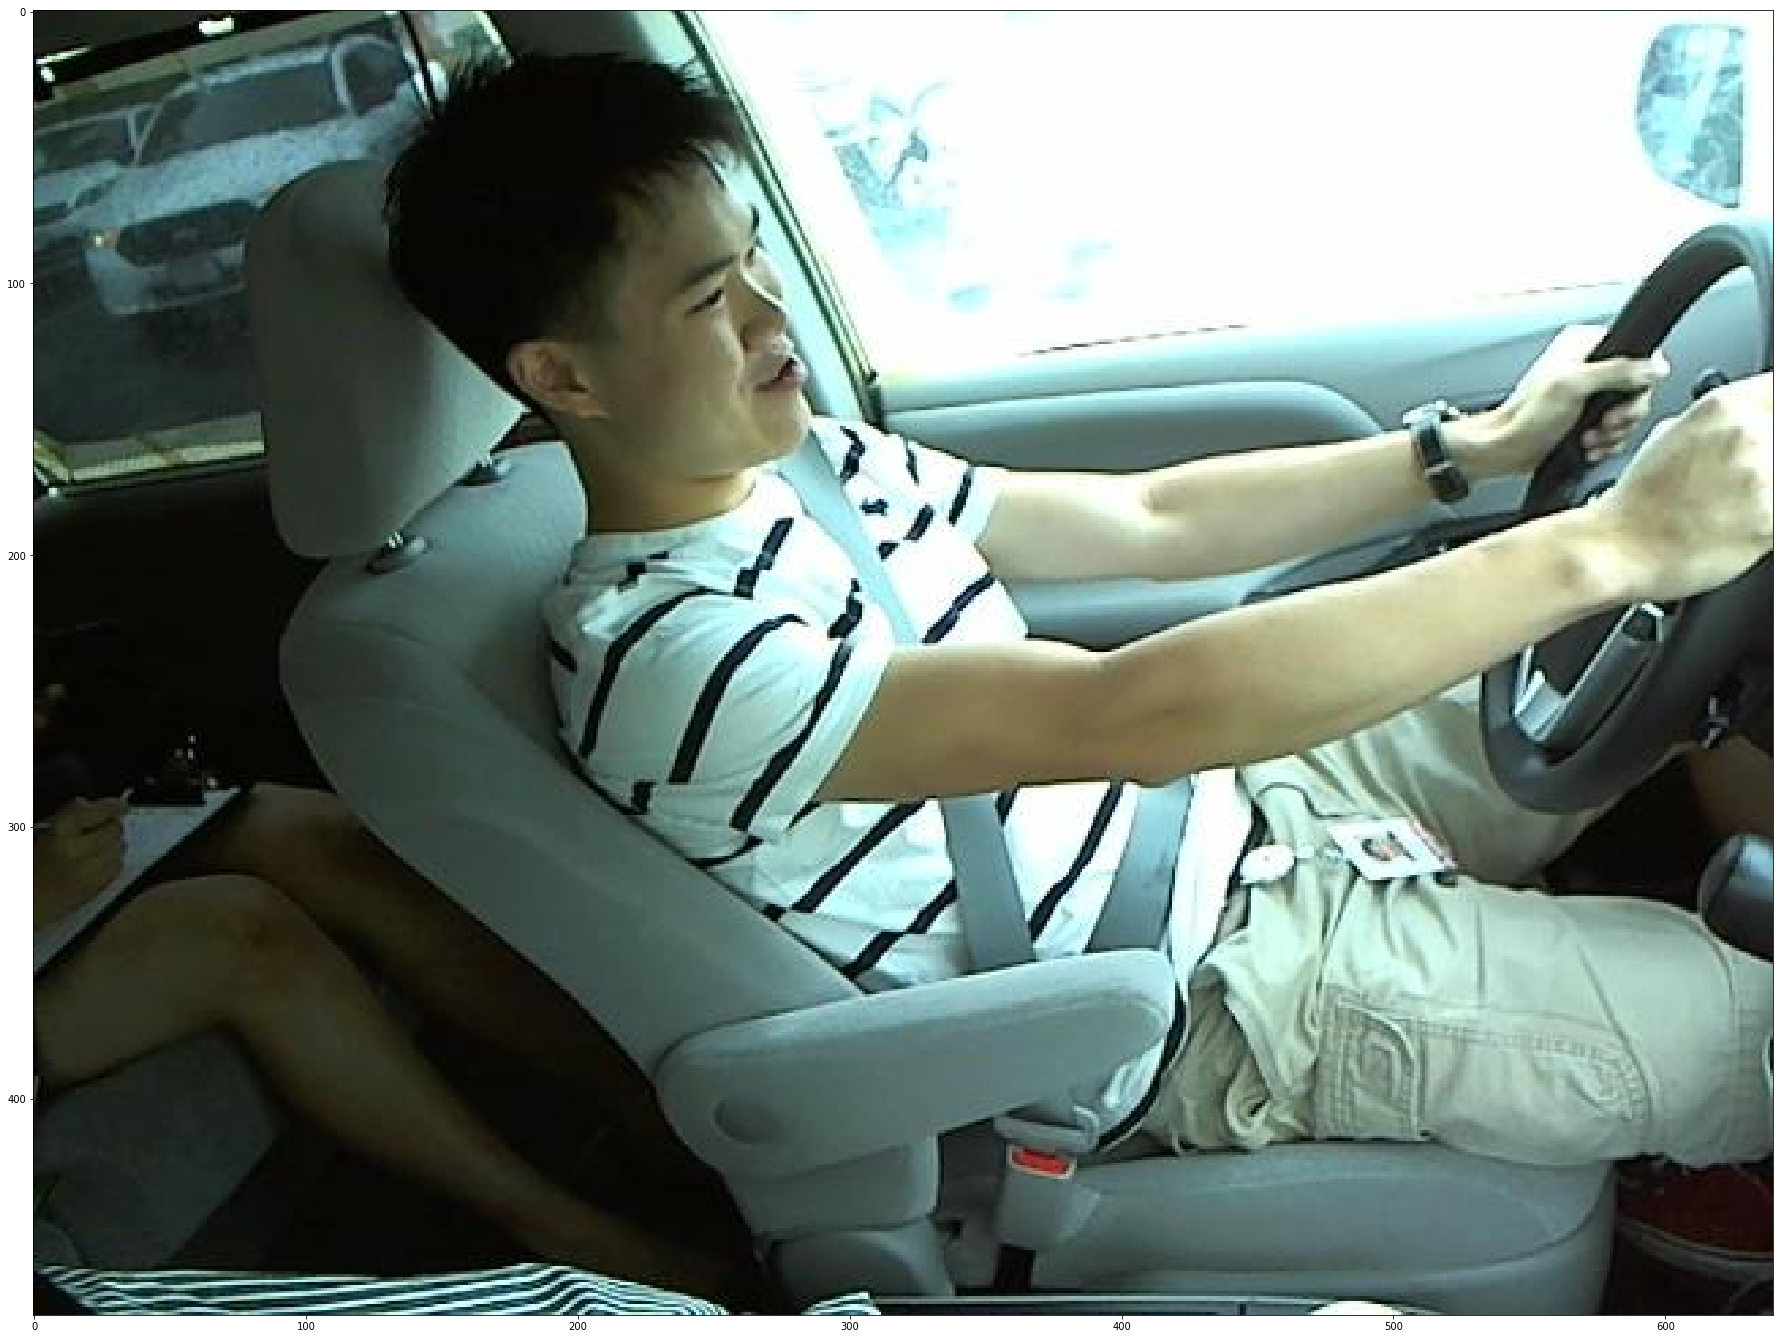

In [15]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image4)

In [6]:
image_path_10='../dataSetImage/stateFarm_distractedDriver_all/imgs/train/c0/img_10206.jpg'
image10 = cv2.imread(image_path_10, cv2.IMREAD_REDUCED_GRAYSCALE_2)

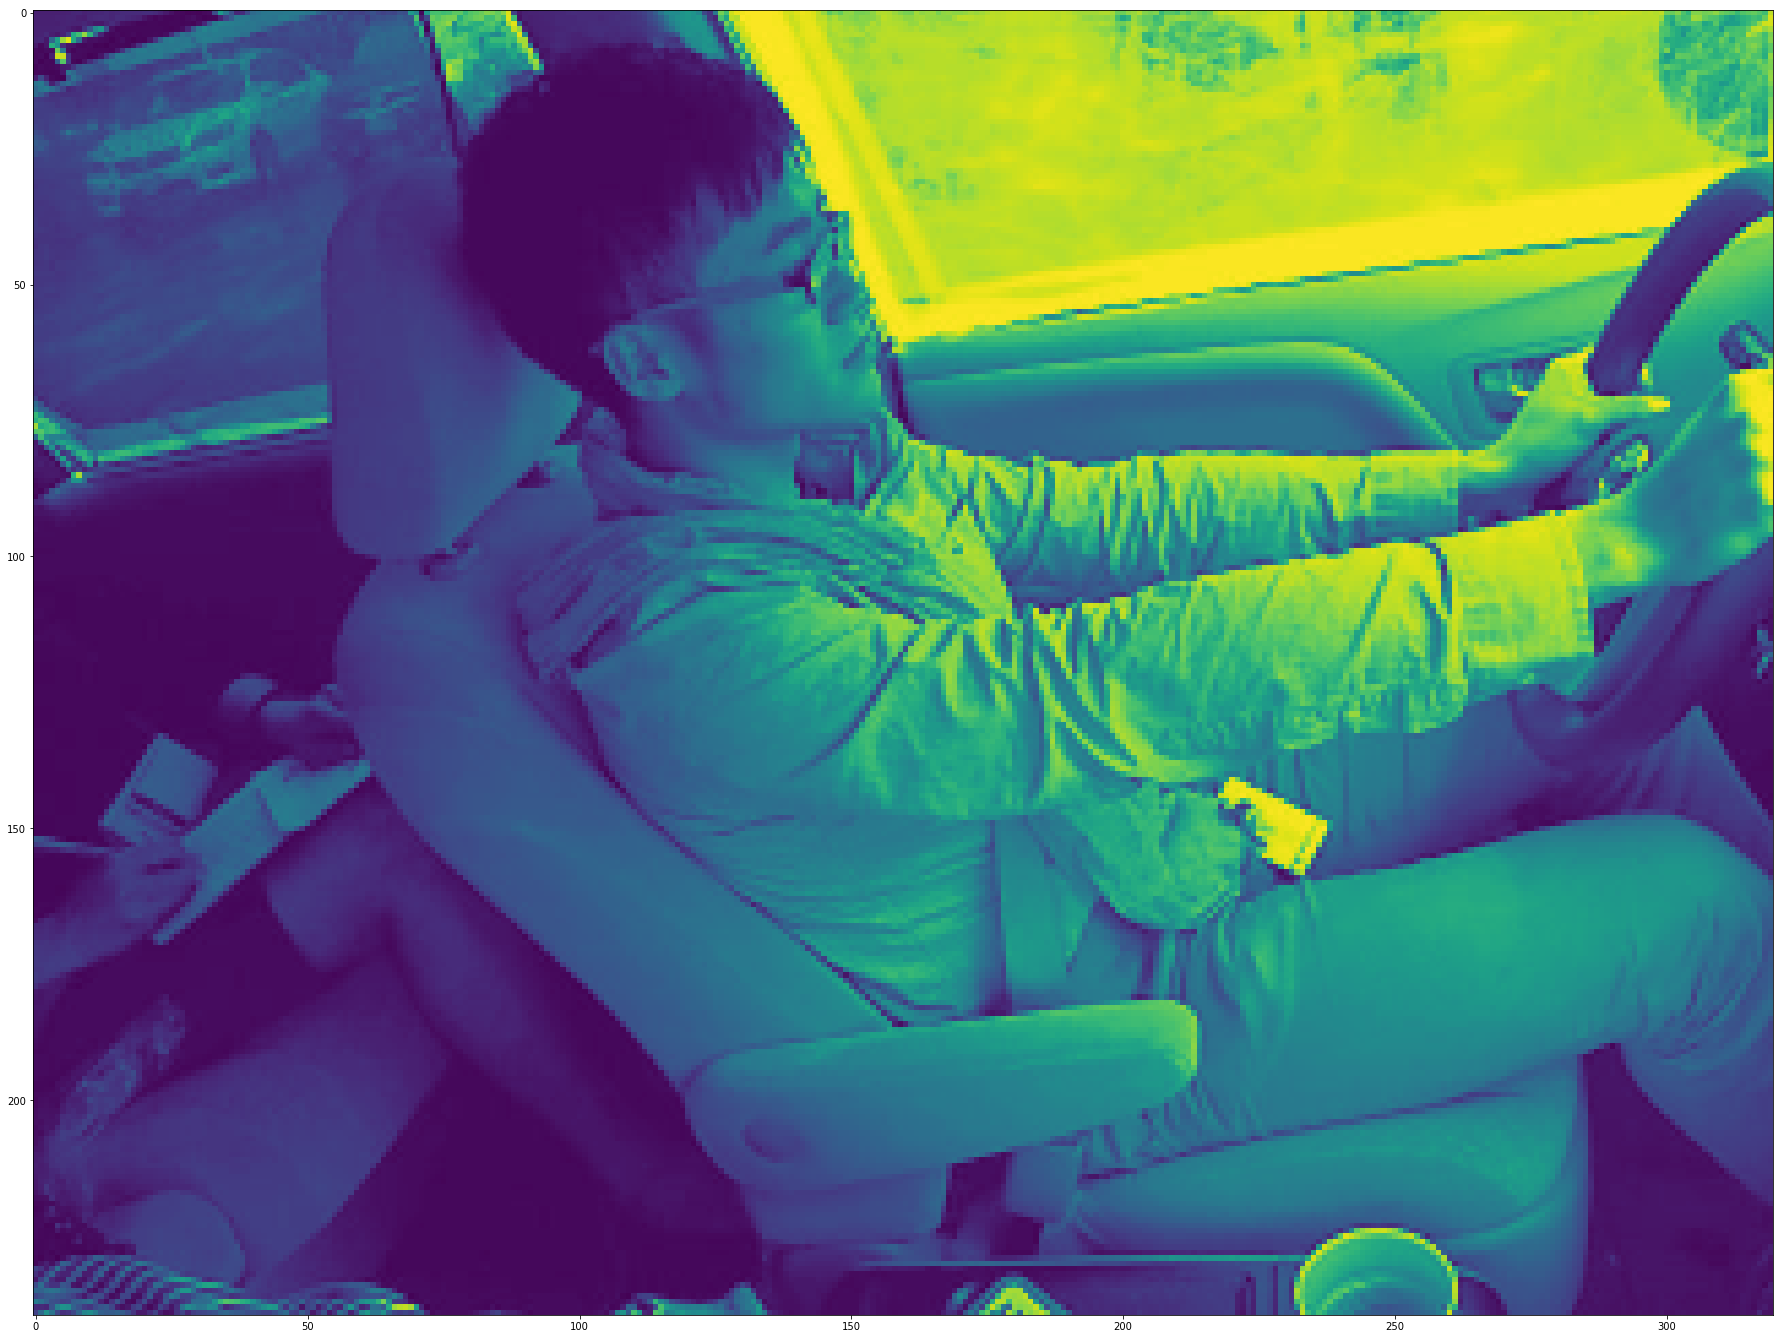

In [7]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image10)

In [8]:
image_path_100='../dataSetImage/stateFarm_distractedDriver_all/imgs/train/c0/img_10206.jpg'
image100 = cv2.imread(image_path_100, cv2.IMREAD_REDUCED_GRAYSCALE_4)

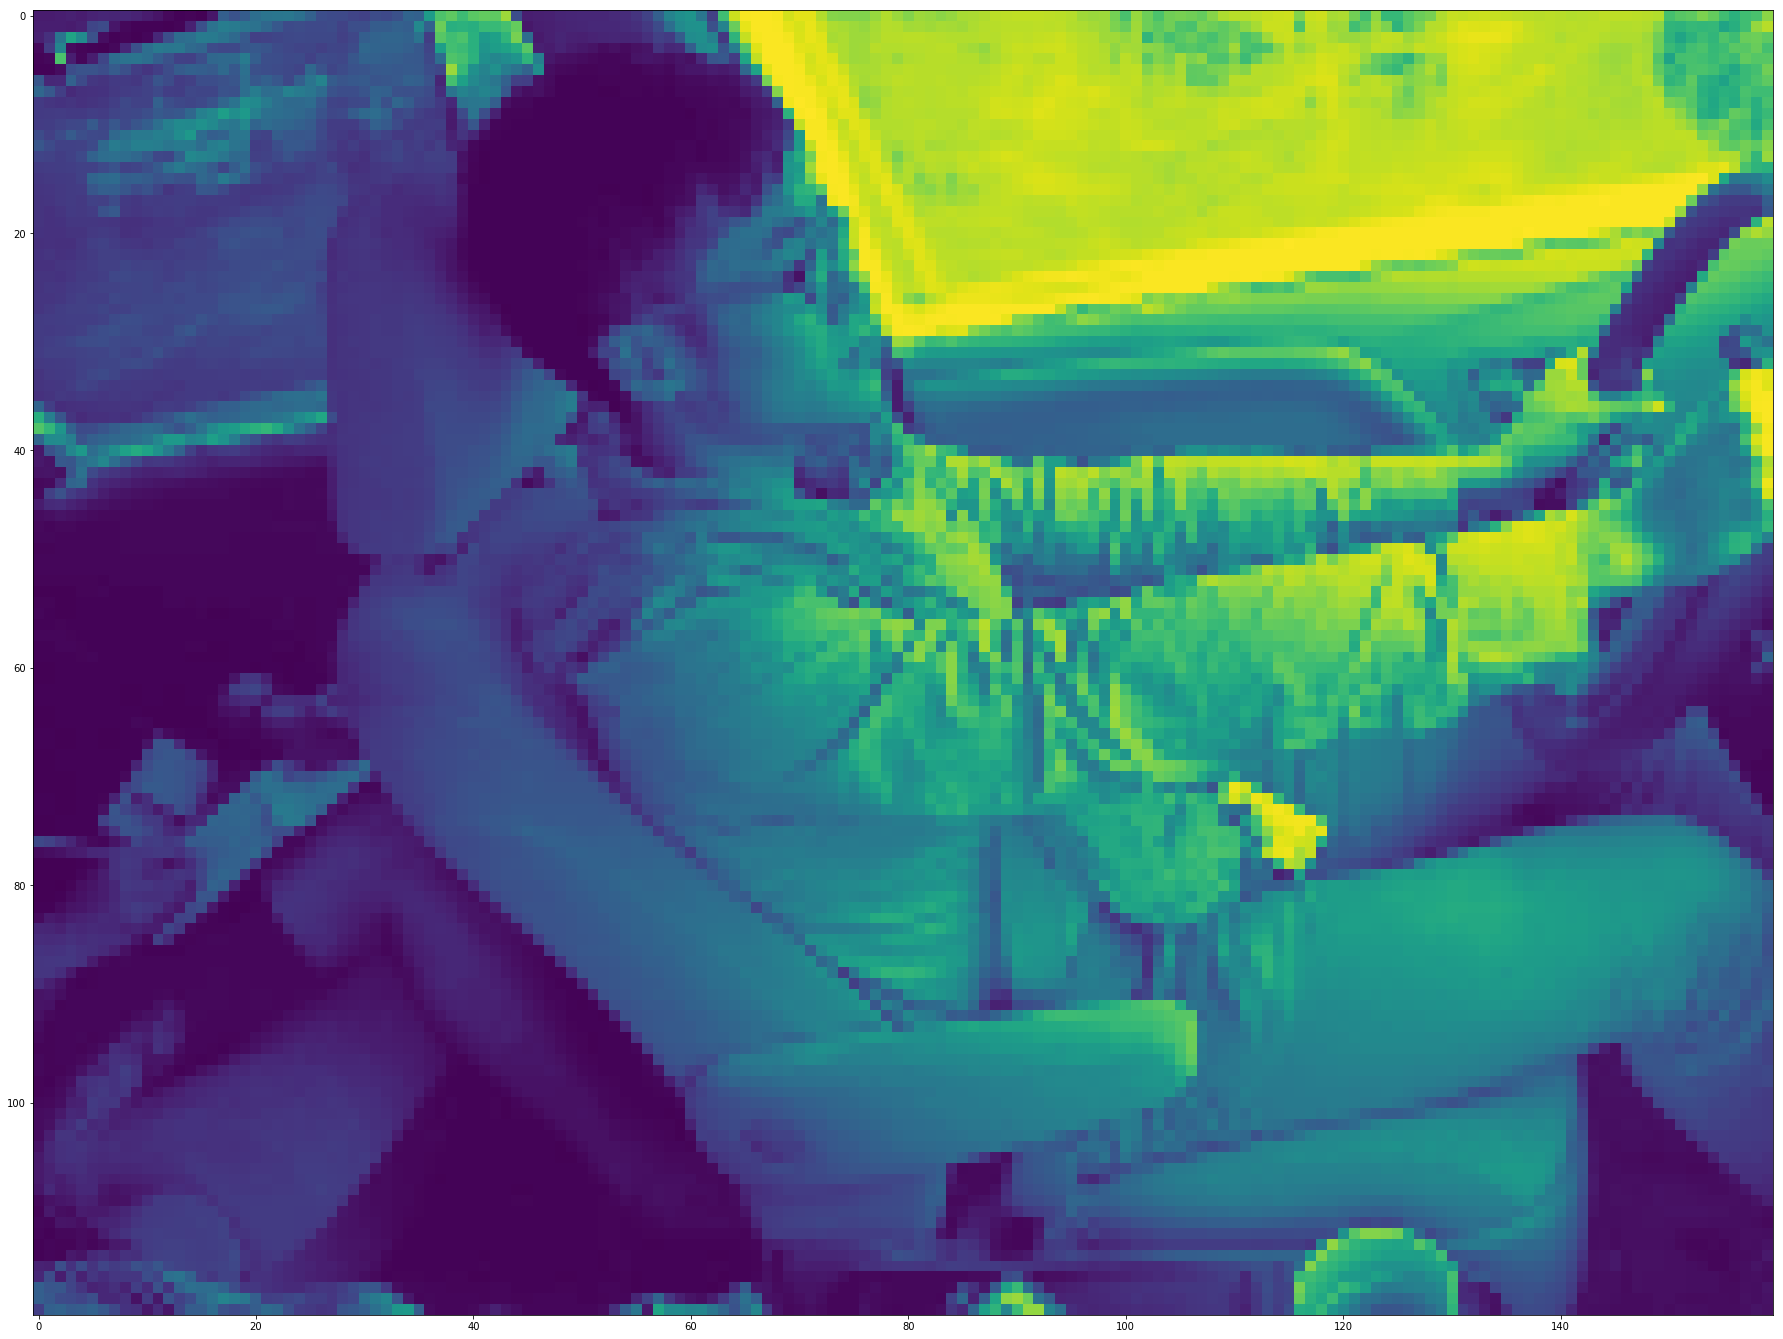

In [9]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image100)

In [16]:
image_path_1000='../dataSetImage/stateFarm_distractedDriver_all/imgs/train/c0/img_10206.jpg'
image1000 = cv2.imread(image_path_1000, cv2.IMREAD_REDUCED_GRAYSCALE_8)

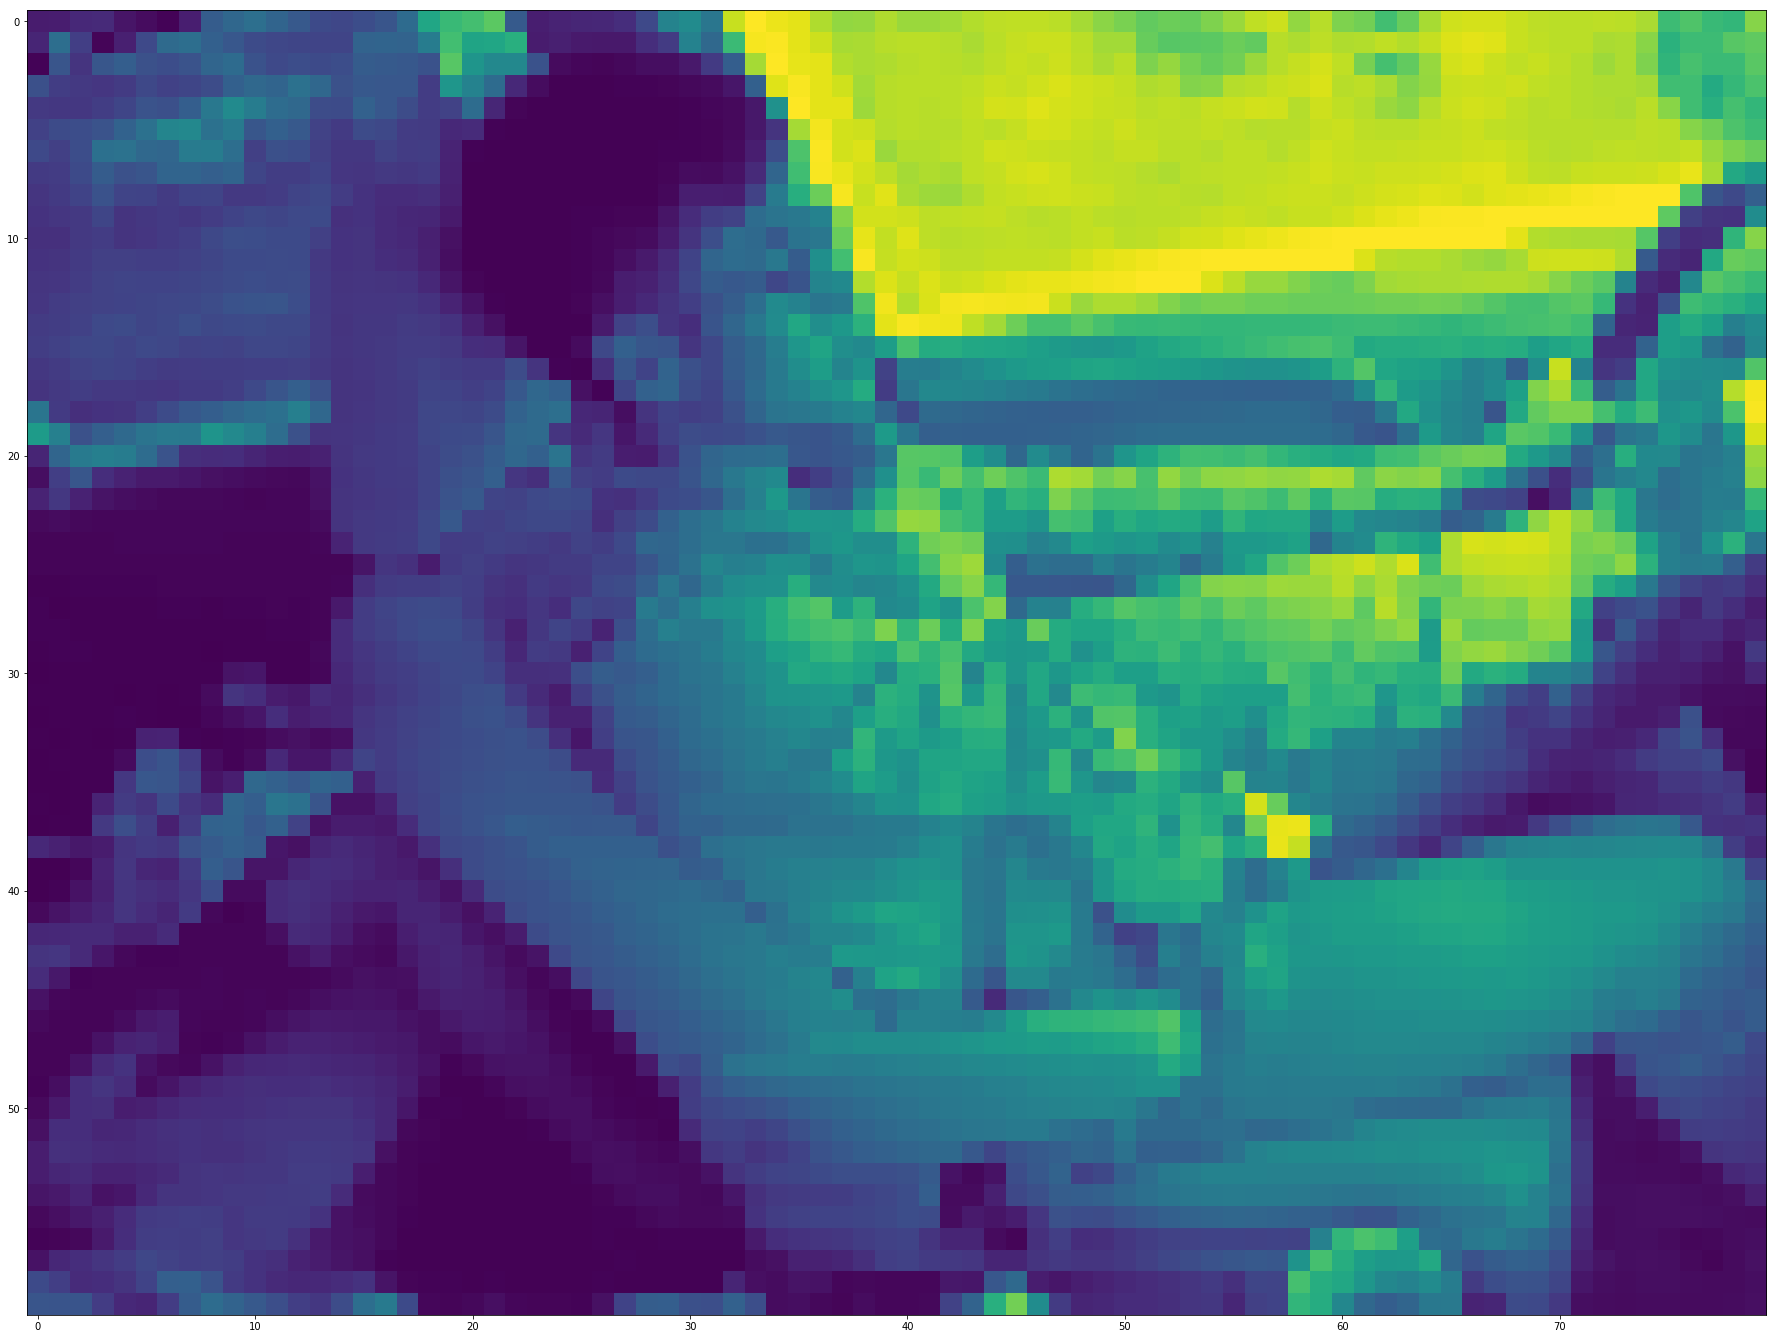

In [17]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image1000)

In [18]:
#print(image.shape)
print(image10.shape)
print(image100.shape)
print(image1000.shape)

(240, 320)
(120, 160)
(60, 80)


In [19]:
image_path_100='../dataSetImage/stateFarm_distractedDriver_all/imgs/train/c0/img_10206.jpg'
image100c = cv2.imread(image_path_100, cv2.IMREAD_REDUCED_COLOR_4)

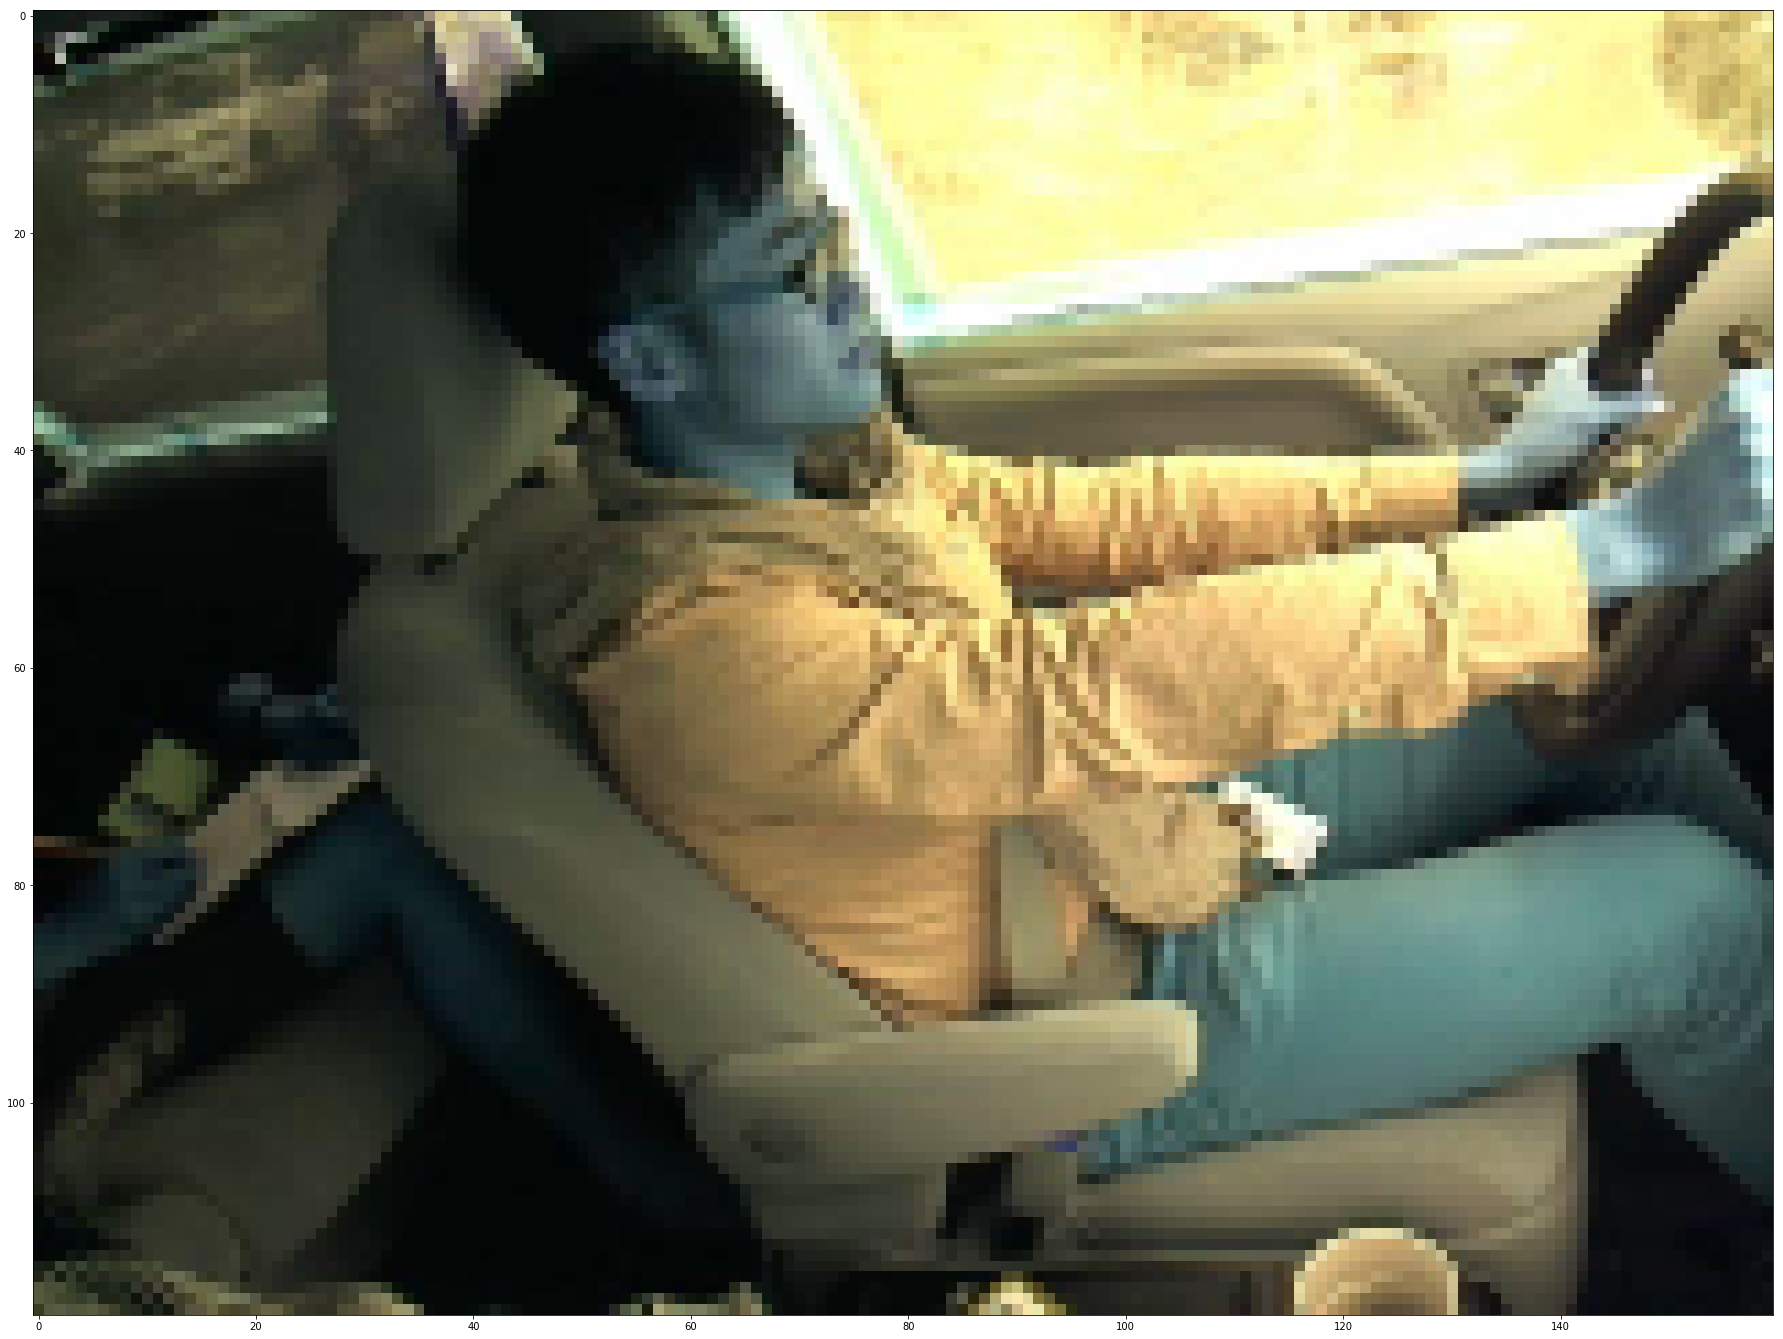

In [20]:
plt.figure(figsize=(32,24))
plt.subplot(1,1,1)
plt.imshow(image100c)

In [21]:
imgt1=image100
imgt2=np.reshape(imgt1,(1,120*160))

In [22]:
print(imgt2.shape)

(1, 19200)


In [23]:
print(imgt2[0])

[23 23 25 ... 14 17 15]


In [24]:
lst1=list(imgt2)

In [25]:
print(lst1[:10])

[array([23, 23, 25, ..., 14, 17, 15], dtype=uint8)]


In [26]:
lst2=imgt2.tolist()

In [27]:
print(lst2[:10])

[[23, 23, 25, 27, 24, 29, 31, 30, 32, 29, 23, 18, 10, 6, 7, 5, 19, 80, 67, 77, 95, 101, 103, 104, 97, 82, 63, 60, 59, 55, 53, 62, 59, 66, 85, 82, 142, 185, 193, 176, 191, 195, 193, 218, 63, 25, 26, 27, 30, 31, 32, 32, 32, 34, 36, 42, 54, 80, 116, 129, 134, 103, 52, 178, 235, 253, 254, 254, 252, 238, 245, 245, 226, 209, 208, 208, 207, 216, 226, 217, 208, 218, 216, 211, 215, 222, 223, 225, 229, 230, 231, 231, 231, 230, 229, 227, 219, 217, 218, 203, 183, 216, 200, 184, 201, 204, 201, 196, 209, 224, 228, 227, 230, 233, 235, 236, 207, 234, 236, 222, 224, 202, 180, 212, 172, 172, 189, 199, 204, 225, 233, 232, 234, 235, 233, 232, 230, 229, 228, 229, 228, 226, 227, 228, 230, 230, 230, 229, 228, 226, 181, 190, 193, 205, 196, 178, 164, 178, 183, 211, 25, 25, 25, 23, 27, 56, 61, 19, 9, 6, 6, 6, 5, 7, 27, 65, 99, 110, 106, 102, 99, 88, 73, 60, 62, 59, 59, 61, 54, 64, 64, 77, 77, 82, 79, 122, 82, 199, 162, 165, 161, 173, 173, 181, 196, 20, 25, 26, 29, 30, 31, 33, 33, 33, 35, 38, 46, 61, 95, 124, 13